In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing amazon review data
df = pd.read_csv('Untitled spreadsheet - amazon_cells_labelled-Copy1.csv', header=None)
df.columns = ['message', 'review']

In [4]:
df.head()

,message,review
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [5]:
# list of key words for a positive review
keywords = ['good', 'Great', 'awesome', 'best', 'nice', 'quality','impressed','Excellent','well','ideal','highly','must have','love','beautiful','super']

for key in keywords:
    df[str(key)] = df.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    # added spaces around the key so that we're getting the word,
    # not just pattern matching.

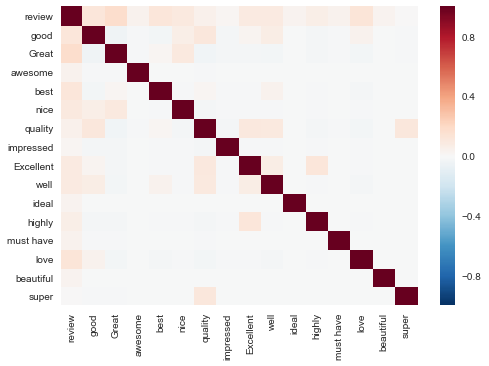

In [6]:
# checking the corrilation using a heatmap
sns.heatmap(df.corr())

In [7]:
df['review'] = (df['review'] == 1)
# changing review into bool value

In [8]:
# adding our keywords as test data and are prediction target
data = df[keywords]
target = df['review']

In [10]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
# We are also Importing corss_validate from sklearn to test our data using multiple folds
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_validate

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
print(cross_validate(bnb, data, target, cv=5))

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

{'fit_time': array([ 0.0059998 ,  0.00300169,  0.00200057,  0.00200105,  0.00199938]), 'score_time': array([ 0.00100064,  0.        ,  0.        ,  0.00100327,  0.        ]), 'test_score': array([ 0.635,  0.62 ,  0.61 ,  0.62 ,  0.575]), 'train_score': array([ 0.6125 ,  0.61625,  0.61875,  0.61875,  0.6275 ])}
Number of mislabeled points out of a total 1000 points : 381


### Results of CV

From out cross validation we can tell that we are currently over fitting our model.  We know this by looking at our training scores in comparison to our test scores.  The fifth score is all the way down at 57.5

In [11]:
# importing confusion matrix to see where we were right and where we were wrong
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[469,  31],
       [350, 150]], dtype=int64)

In [12]:
# Importing metrics to see some advanced stats and see how well our model has preformed
from sklearn.metrics import classification_report
print(classification_report(target, y_pred))

             precision    recall  f1-score   support

      False       0.57      0.94      0.71       500
       True       0.83      0.30      0.44       500

avg / total       0.70      0.62      0.58      1000



## Analysis For Amazon Review Classifier

First using sklearn's confusion_matrix we can see a nice break down of our models predictions.  Currently, our model is 61.9% accurate. Our errors consist of 31 false positives or Type 1 errors and 350 false negative, or type 2 errors. A possible solution would be to add more features to try and cut down on our type 2 errors.  Before adjusting our features lets see what affect changing our model with have on our results.

In [14]:
from sklearn.naive_bayes import GaussianNB

#creaing variable for our model
gnb = GaussianNB()

# setting up our cross validation
print(cross_validate(bnb, data, target, cv=5))

# Fitting our model to the data
gnb.fit(data, target)

# Storing the result as a new variable
y_pred = gnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

{'fit_time': array([ 0.00800014,  0.00350428,  0.00249839,  0.00300002,  0.00200081]), 'score_time': array([ 0.00099993,  0.00049996,  0.00049996,  0.00050044,  0.00050044]), 'test_score': array([ 0.635,  0.62 ,  0.61 ,  0.62 ,  0.575]), 'train_score': array([ 0.6125 ,  0.61625,  0.61875,  0.61875,  0.6275 ])}
Number of mislabeled points out of a total 1000 points : 409


### Results of CV

This model looks like it is having the exact same problem as the one before. We can tell that we are currently over fitting our model.  We know this by looking at our training scores in comparison to our test scores.  The fifth score is all the way down at 57.5

In [12]:
# importing confusion matrix to see where we were right and where we were wrong
confusion_matrix(target, y_pred)

array([[498,   2],
       [407,  93]], dtype=int64)

In [13]:
print(classification_report(target, y_pred))

             precision    recall  f1-score   support

      False       0.55      1.00      0.71       500
       True       0.98      0.19      0.31       500

avg / total       0.76      0.59      0.51      1000



## Analysis for Amazon GaussianNB

Using this type of model has lowered our overall accuracy to 58.1%. However, using this model we have reduced out Type 1 errors from 31 to only 2. Although our over all accuracy is lower this maybe worth the 3.8% drop to avoid giving false results.

In [2]:
# lets move on to our next dataset and see how our models adapt.
# here I am importing a dataset of yelp reviews.
yelp = pd.read_csv('yelp_labelled - yelp_labelled-Copy1.csv')
yelp.columns = ['message', 'review']
yelp.head()

,message,review
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0


In [3]:
# After looking at the head of this dataset I think it would be easier to make a model to find negative reviews

In [4]:
# lets set up our list of negative words to search for in our yelp reviews
ykeywords = ['gross','nasty','angry','rubber','bad','awful','disgusted','disgusting','dirty','blah','bland','never','worst','poor','drag','frozen']

for key in ykeywords:
    yelp[str(key)] = yelp.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    # added spaces around the key so that we're getting the word,
    # not just pattern matching.

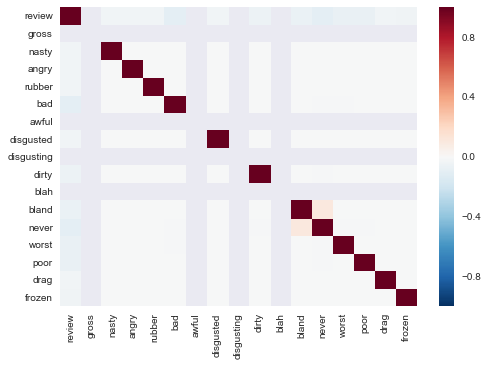

In [5]:
# checking the corrilation using a heatmap
sns.heatmap(yelp.corr())

In [6]:
yelp['review'] = (yelp['review'] == 0)
# changing review into bool value

In [7]:
# map our keywords so they are ready for testing, set the target of what we want to predict
ypdata = yelp[ykeywords]
yptarget = yelp['review']

In [10]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# import cross validation from sklearn
from sklearn.model_selection import cross_validate

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# set up our cross validation
print(cross_validate(bnb, ypdata, yptarget, cv=5))

# Fit our model to the data.
bnb.fit(ypdata, yptarget)

# Classify, storing the result in a new variable.
yelp_pred = bnb.predict(ypdata)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    ypdata.shape[0],
    (yptarget != yelp_pred).sum()
))

{'fit_time': array([ 0.00199962,  0.00199938,  0.00199986,  0.00200057,  0.00099969]), 'score_time': array([ 0.        ,  0.00100017,  0.        ,  0.00099945,  0.0010004 ]), 'test_score': array([ 0.555     ,  0.555     ,  0.53      ,  0.545     ,  0.51758794]), 'train_score': array([ 0.54067584,  0.5456821 ,  0.55193992,  0.5456821 ,  0.55375   ])}
Number of mislabeled points out of a total 999 points : 452


### Results of CV

This model is actually fitted very well.  Unlike the amazon model there is very little difference between our test and train data.

In [23]:
# importing confusion matrix to see where we were right and where we were wrong
confusion_matrix(yptarget, yelp_pred)

array([[495,   4],
       [448,  52]], dtype=int64)

In [24]:
print(classification_report(yptarget, yelp_pred))

             precision    recall  f1-score   support

      False       0.52      0.99      0.69       499
       True       0.93      0.10      0.19       500

avg / total       0.73      0.55      0.44       999



## Analysis for Yelp Review Classifier

Using our confusion matrix we can see that this model is less accurate than both of our Amazon models,  with only 54.8% accuracy.  However, it has a lot less Type 1 errors then the Amazon BernoulliNB, with only 4.  Lets see if changing this model to a GaussianNB will help our accuracy.

In [11]:
# importing Gaussian model
from sklearn.naive_bayes import GaussianNB
# importing cross validation
from sklearn.model_selection import cross_validate

#creaing variable for our model
gnb = GaussianNB()

# applying CV
print(cross_validate(gnb, ypdata, yptarget, cv= 5))

# Fitting our model to the data
gnb.fit(ypdata, yptarget)

# Storing the result as a new variable
yelp_pred = gnb.predict(ypdata)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    ypdata.shape[0],
    (yptarget != yelp_pred).sum()
))

{'fit_time': array([ 0.00300241,  0.00300074,  0.00200009,  0.00200057,  0.00200009]), 'score_time': array([ 0.00099754,  0.00099969,  0.00099993,  0.00099993,  0.        ]), 'test_score': array([ 0.555     ,  0.525     ,  0.525     ,  0.54      ,  0.51758794]), 'train_score': array([ 0.54067584,  0.53692115,  0.53692115,  0.53066333,  0.5375    ])}
Number of mislabeled points out of a total 999 points : 465


### Results of CV

Same as before, changing the type of model have very little affect on our cross validation.  Our model still fits very well. It is displaying very little difference between our test and train data.

In [26]:
# importing confusion matrix to see where we were right and where we were wrong
confusion_matrix(yptarget, yelp_pred)

array([[498,   1],
       [464,  36]], dtype=int64)

In [27]:
print(classification_report(yptarget, yelp_pred))

             precision    recall  f1-score   support

      False       0.52      1.00      0.68       499
       True       0.97      0.07      0.13       500

avg / total       0.75      0.53      0.41       999



## Analysis for Yelp GaussianNB

Once again we see that Gaussian is less accurate only getting 53.5 % of its predictions correct.  However, it does still have less type one errors then our Bernoulli model, but with our Bernoulli model only having 4 type one errrors I don't think it justifies us switching models.

In [12]:
#Now, I am going to switch our amazon model to filter for negative reviews

In [13]:
df2 = pd.read_csv('Untitled spreadsheet - amazon_cells_labelled-Copy1.csv', header=None)
df2.columns = ['message', 'review']

In [14]:
df2.head()

,message,review
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [15]:
# list of key words for a positive review
keyw = ['bad', 'broken', 'worthless', 'garbage', 'trash', 'awful', 'expensive', 'refund','waste','wasted','problems','short','error','broke','money']

for key in keyw:
    df2[str(key)] = df2.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    # added spaces around the key so that we're getting the word,
    # not just pattern matching.

In [16]:
df2['allcaps'] = df2.message.str.isupper()

In [17]:
df2['review'] = (df2['review'] == 0)
# changing review into bool

In [18]:
data2 = df2[keyw + ['allcaps']]
target2 = df2['review']

In [22]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# importing CV
from sklearn.model_selection import cross_validate

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fitting CV
print(cross_validate(bnb, data2, target2, cv=5))
# Fit our model to the data.
bnb.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred2 = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))

{'fit_time': array([ 0.00200009,  0.00299978,  0.00300479,  0.00250006,  0.00200009]), 'score_time': array([ 0.00099969,  0.00100017,  0.00049973,  0.00049996,  0.00050044]), 'test_score': array([ 0.54 ,  0.565,  0.51 ,  0.535,  0.525]), 'train_score': array([ 0.53625,  0.53125,  0.545  ,  0.53875,  0.54   ])}
Number of mislabeled points out of a total 1000 points : 462


### Results of CV

This model is actually fitted very well.  Unlike our positive review model for Amazon. This model has very little difference between our test and train data.

In [28]:
# import confusion matrix
from sklearn.metrics import confusion_matrix
# import metrics report
from sklearn.metrics import classification_report
# calling confusion matrix
print(confusion_matrix(target2, y_pred2),classification_report(target2, y_pred2))

[[492   8]
 [454  46]]              precision    recall  f1-score   support

      False       0.52      0.98      0.68       500
       True       0.85      0.09      0.17       500

avg / total       0.69      0.54      0.42      1000



## Analysis for Negative Amazon Review Classifier

This model is the least accurate so far with a 53.8% accuracy. Also, it wasn't the most precise with 8 false positives.  One positive thing about the model was its fitting.

## Conclusion

I believe that my second model, Amazon positive gnb, was the best model I created.  Although my first model, the Amazon positive bnb, was the most accurate. It lacked percision with 31 false positive.  I believe this was do to the over fitting, that was shown with our cross validation.  Looking at the heat map for my first two models I don't think there was one feature that really stood out to me. It seems like they were pretty evenly used.

# EXTRA

### Below was a test I ran trying to use PCA to increase efficiency... it did not work

In [23]:
df2.head()

,message,review,bad,broken,worthless,garbage,trash,awful,expensive,refund,waste,wasted,problems,short,error,broke,money,allcaps
0,So there is no way for me to plug it in here i...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
df2['message'][3]

'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!'

In [25]:
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [26]:
# next im going to use pca

In [27]:
df2_pca = df2.drop(['message','review'], axis=1)

X = StandardScaler().fit_transform(df2_pca)

sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.11375581  0.09159373  0.08409553]


In [28]:
# switching our old data to our new transformed data

In [29]:
data2 = Y_sklearn

In [30]:
from sklearn.feature_selection import VarianceThreshold

In [31]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred2 = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))

Number of mislabeled points out of a total 1000 points : 472


In [32]:
confusion_matrix(target2, y_pred2)

array([[492,   8],
       [464,  36]], dtype=int64)

In [33]:
print(classification_report(target2, y_pred2))

             precision    recall  f1-score   support

      False       0.51      0.98      0.68       500
       True       0.82      0.07      0.13       500

avg / total       0.67      0.53      0.40      1000

